# Übungszettel 1 - Morphologie & Syntax (1. Teil)
### Abgabefrist: Freitag, 12. Mai 2023, 9:59 Uhr

_Umbennenung des Jupyter Notebooks mit Gruppenname und Techfak-Kürzel!_

Punkte insgesamt möglich: _20 Punkte_

## Aufgabe 1: _(5 Punkte)_

### A1.1: _(3 Punkte)_
Erklärt die Begriffe **Morphologie**, **Morphem** und **Affix**. Benutzt für die Erklärung des Begriffs **Affix** die folgenden Beispielwörtern (geht dabei auf alle fünf ein):

* Kaffeesatzleserin
* laufend
* verwerfen
* einzunehmen
* verspielt

#### Antwort:
* Eine Morphologie ist der Bereich der Linguistik, welcher sich mit der Struktur von Wörtern beschäftigt.
* Ein Morphem ist die kleinste bedeutungstragende Einheit auf der Ebene des Sprachsystems. Jedes Wort wird aus Morphemen gebildet. Dabei kann ein Morphem entweder alleine in einen Wort auftreten oder in Kombination mit anderen Morphemen.
* Der Affix ist ebenfalls eine Art von Morphem welcher zur Kombination von Morphemen benutzt werden kann, um die Bedeutung eines Wortes zu erweitern oder zu verändern. Dabei gibt es 2 verschiedene Arten von Affixen. Einmal den Präfix welcher am Anfang eines Wortes auftaucht und einen Suffix, welcher das Ende eines Wortes bildet.
------------------------------------------------------------------------------
- Kaffeesatzleserin | In diesem Fall besteht das Wort aus einem normalen Morphem und 2 Affixen. Einen Präfix (Kaffee) und einen Suffix (leserin)
- laufend | Dieses Wort besteht einmal aus dem Wort (lauf). Allerdings verändert das end welches wieder ein Suffix ist die Bedeutung des Wortes im zeitlichen Sinne. 
- verwerfen | Besteht wieder aus 3 grundlegenden Teilen. Den eigentlichen Morphem (werf), den Präfix (ver) und den Suffix (en). Dabei verändert der Präfix das Wort in diesem Fall negativ
- einzunehmen | hier gibt es zwei grundlegende Präfixe die das Morphem (nehmen) verändern. Einmal ein und einmal zu
- verspielt | Hier ist wieder der Fall das es einen Präfix gibt (ver) zum Morphem (spielt)

### A1.2: _(1 Punkte)_
Erklärt das theoretische Grundprinzip des morphologischen Parsings mit zwei Ebenen und die dafür notwendigen linguistischen Informationen.

#### Antwort:
Das morphologische Parsing beschreibt einen Prozess, bei welchen ein Satz oder ein Wort in Morpheme zerlegt werden. Dabei unterscheidet man zwischen den folgenden Ebenen: 
1. Lexikon Ebene: Hier werden alle Wörter zugeordnet. Dabei wird eine Liste von Wortstämmen und Affixe inkl. Basisinformationen erstellt wie z.B. wird geschaut ob es sich um ein Verb, Adjektiv oder Nomen handelt. 

2. Morphologie Ebene: Hier werden die Wörter in ihre Bestandteile zerlegt (Affixe)

Notwendigen linguistischen Informationen: 

- Wissen über Affixe und wie diese die Bedeutung der Wörter verändern
- Eigenschaften der Wörter wie z.B. Kasus des Wortes
- Wissen über die verschiedenen Zeitformen bei z.B. Verben

### A1.3: _(1 Punkte)_
Nennt zwei Eigenschaften, welche Finite-State-Transducer besonders interessant für das morphologische Parsing machen.

#### Antwort:
1. Flexibel: Der Finite-State-Tranducer ist sehr flexibel und kann sich leicht an verschiedene Sprachen anpassen.
2. Effizient: Der Finite-State-Transducer ist sehr effizient.

## Aufgabe 2: _(10 Punkte)_
Installiert graphviz, falls noch nicht auf eurem Rechner vorhanden.
```bash
sudo apt-get install graphviz
```
oder hier der Download für andere Betriebssysteme: https://graphviz.org/download/

Zusätzlich um `graphviz` in Python zu benutzen:

In [1]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import graphviz
from collections import defaultdict
from typing import Dict, Tuple, Iterable

class FiniteStatePlot:
    """ info: do not use "_s_" as a state name """
    
    def __init__(self, transitions:Dict[str, Tuple[str, str]]=None, final_states:Iterable[str]=None, start_state:str=None):
        self.start_state = start_state
        self.transitions = defaultdict(list)  # key:source_state; entries: list of (target_state, condition)  / adjacency list
        if transitions:
            self.transitions.update(transitions)
        self.final_states = final_states if final_states else set()
    
    def transition(self, source, target, condition=""):
        """ create transition from source state to target state with a condition. """
        self.transitions[source].append((target, condition))
    
    def state(self, name, is_final=False, is_start=False):
        """ assign final and start properties to a state. (Add the state to the adjacency list, not necessary because of defaultdict but useful for counting number of nodes) """
        if name not in self.transitions:
            self.transitions[name] = []
        if is_final:
            self.final_states.update([name])
        elif name in self.final_states:
            self.final_states.remove(name)
        if is_start:
            self.start_state = name
    
    def plot(self):
        """ plot the finite state machine with graphviz in jupyter-notebook if the method call is the last statement in a jupyter cell."""
        
        return graphviz.Source(f"""
        digraph finite_state_machine {{
            fontname="Helvetica,Arial,sans-serif"
            node [fontname="Helvetica,Arial,sans-serif"]
            edge [fontname="Helvetica,Arial,sans-serif"]
            rankdir=LR;
            {f"node [shape = point ]; _s_" if self.start_state else ""}
            node [shape = doublecircle]; {" ".join(self.final_states) + (";" if self.final_states else "")}
            node [shape = circle];
            {f"_s_ -> {self.start_state};" if self.start_state else ""}
            {"".join(f'{s} -> {t} [label = "{condition}"]' for s, transitions in self.transitions.items() for (t, condition) in transitions)}
        }}
        """)

### A2.1: _(4 Punkte)_
Erstellt ein _deterministischen_ Finite-State Lexikon, welches **alle** Wörter (+ `#`) aus dem Dialog (in der `text`-Variable) (Satzzeichen und die Sprechernamen können ignoriert werden) parsen kann. Implementiert dafür entweder die Klassenmethode `create(self, words)` welche für eine Menge an Wörtern das FS-Lexikon erstellt oder erstellt händisch allen Transitionen, die eine FS-Lexikon braucht, um genau diese Wörter zu parsen. Vergesst in beiden Fällen nicht den Startzustand und euren Endzustand zu definieren.

Relevant für _deterministisch_: Übergänge von einem Zustand dürfen nicht mehrdeutig sein und es sollen keine "ε" Übergänge existieren. Negatives Beispiel: Zustand q0 hat Übergänge "abc" und "ab" in zwei unterschiedliche Zustände. Nicht deterministisch, da die Überprüfung für beide Übergänge wahr sein könnten (2x "a" Übergang).

- Das Wortgrenzzeichen "#" soll **immer allein** (ohne andere Buchstaben) in den Endzustand führen.
- Ihr dürft für die Implementierung weitere Methoden zur Lexikon-Klasse hinzufügen.
- Für die Implementierung der `create`-Methode bietet es sich an immer nur einen Buchstaben für einen Übergang zu betrachten. Die `reduce`-Methode versucht diesen "aufgeblähten" FSL zu reduzieren, um den Plot zu verkleinern.
- Die Übergänge werden mittels einer Adjazenzliste repräsentiert. Die Einträge in der Liste sind Tuple mit dem nächsten Zustand [0] und der Übergangsbedingung [1].
- Der FSL muss NICHT komprimiert sein (z. B. den Übergang `#` oder das Mehrzahl "s" oder He-She-It "s" möglichst häufig wiederverwenden).

In [7]:
class FiniteStateLexicon(FiniteStatePlot):
    
    def __init__(self, transitions:Dict[str, Tuple[str, str]]=None, final_states:Iterable[str]=None, start_state:str=None):
        super().__init__(transitions, final_states, start_state)
        self.reset()
        
    def run(self, word):
        if not self.current_state:
            return False
        while True:
            for next_state, condition in self.transitions[self.current_state]:
                #  startswith only for reduced finite state lexicon, == should be enough for single letter transitions
                if word.startswith(condition):
                    self.current_state = next_state
                    word = word[len(condition):]
                    break
            else:
                return False
            if not word:
                return self.current_state in self.final_states
    
    def reset(self):
        self.current_state = self.start_state
    
    def test_determinism(self):
        for _, transitions in self.transitions.items():
            last = ";"
            for x in sorted([t for _, t in transitions]):
                assert x and not x.startswith(last), f"Determinism failed: {x, last}"
                assert x != "", f"Determinism failed: found epsilon transition"
                last = x[0]
    
    def test_only_single_transitions(self):
        if not self.transitions.values():
            return True
        for transitions in self.transitions.values():
            if any(len(c) > 1 for _, c in transitions):
                return False
        return True
            
    def reduce(self):
        """ reduce a graph """
        transitions = self.transitions.copy()
        not_visited_states = list(transitions.keys())  # copy
        cur_state = self.start_state
        while not_visited_states:
            if cur_state in not_visited_states:
                not_visited_states.remove(cur_state)
            if cur_state not in transitions or not transitions[cur_state]:
                cur_state = not_visited_states.pop(0)
                continue
            del_cur_state_transitions = []
            for i in range(len(self.transitions[cur_state])):
                t, c = self.transitions[cur_state][i]
                simple_states, conditions = [], []
                while len(transitions[t]) == 1:
                    simple_states.append(t)
                    conditions.append(c)
                    t, c = transitions[t][0]
                if c != "#":  # '#' still in single transition
                    simple_states.append(t)
                    conditions.append(c)
                if simple_states:
                    transitions[cur_state].append((simple_states[-1], "".join(conditions)))
                    del_cur_state_transitions.append(i)
                    for n in simple_states[:-1]:
                        del transitions[n]
            for i in reversed(del_cur_state_transitions):
                self.transitions[cur_state].pop(i)
            cur_state = not_visited_states.pop(0)
        self.transitions = transitions
    
    def create(self, words):
      assert self.test_only_single_transitions(), "'create'-method cannot add words to a lexicon that is reduced"
       
        # Eure Lösung hier oder erstellt für genau diese Wörter von Hand einen Finite State Lexikon und fügt die Transitions und States einzeln, außerhalb dieser Klasse hinzu
  

      transitions = {}
      final = set()
      start = "S"

      for word in words:
          current = start
          for i, char in enumerate(word):
              next = f"q{i}"
              condition = char
              transitions.setdefault(current, [])
              for state, cond in transitions[current]:
                if state == next and cond == condition:
                    break
              else:
                transitions[current].append((next, condition))
                transitions.setdefault(next, [])
              current = next

          final.add(current)


      print("Transitions:")
      for state, trans in transitions.items():
          print(state, trans)

      self.transitions = transitions
      self.final_states = final
      self.start_state = start
      self.reset()

In [8]:
text = """
Paul: did you see the game or did you go fishing?
Joe: I was fishing and caught a squid.
Paul: Have you seen, last time I caught many squids.
"""
my_lexicon = FiniteStateLexicon()

# convert text to set of words with "#"
lexicon_words = set(map(lambda x: f"{''.join(filter(lambda x: x.isalpha(), x))}#", 
                        filter(lambda x: ":" not in x, text.split())))  # remove punctuation, speaker annotation, repetitions
my_lexicon.create(lexicon_words)  # implementieren

## Oder hier Lösung von Hand: Fügt die Transitions und States einzeln hinzu, die nötig sind, um (nur) diese Wörter zu parsen.
# my_lexicon.transition(source="q0", target="q1", condition="a")
# my_lexicon.state("q0", is_start=True)
## ...

Transitions:
S [('q0', 'm'), ('q0', 'I'), ('q0', 'l'), ('q0', 's'), ('q0', 'H'), ('q0', 'g'), ('q0', 't'), ('q0', 'a'), ('q0', 'c'), ('q0', 'w'), ('q0', 'o'), ('q0', 'f'), ('q0', 'd'), ('q0', 'y')]
q0 [('q1', 'a'), ('q1', '#'), ('q1', 'e'), ('q1', 'q'), ('q1', 'o'), ('q1', 'i'), ('q1', 'n'), ('q1', 'r'), ('q1', 'h')]
q1 [('q2', 'n'), ('q2', 's'), ('q2', 'e'), ('q2', 'u'), ('q2', 'v'), ('q2', 'm'), ('q2', '#'), ('q2', 'd')]
q2 [('q3', 'y'), ('q3', 't'), ('q3', 'n'), ('q3', 'i'), ('q3', 'e'), ('q3', '#'), ('q3', 'g'), ('q3', 'h')]
q3 [('q4', '#'), ('q4', 'd'), ('q4', 'h'), ('q4', 'i')]
q4 [('q5', 's'), ('q5', '#'), ('q5', 't'), ('q5', 'n')]
q5 [('q6', '#'), ('q6', 'g')]
q6 [('q7', '#')]
q7 []


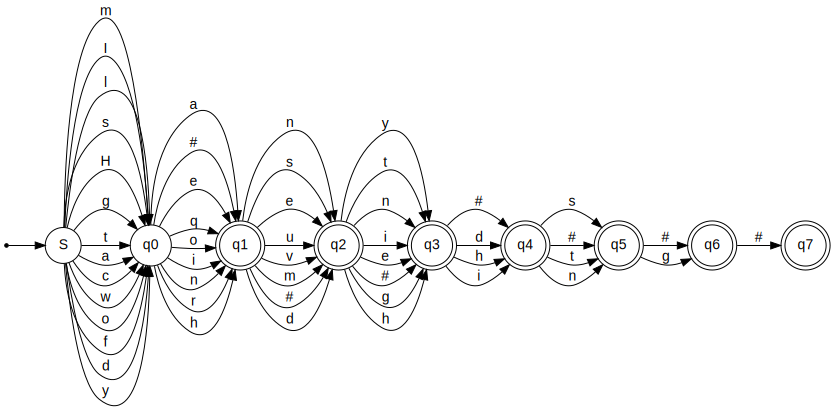

In [9]:
for w in lexicon_words:
    if not my_lexicon.run(w):
        print(f"Lexicon cannot parse word '{w}'")
    my_lexicon.reset()
my_lexicon.test_determinism()
my_lexicon.plot()

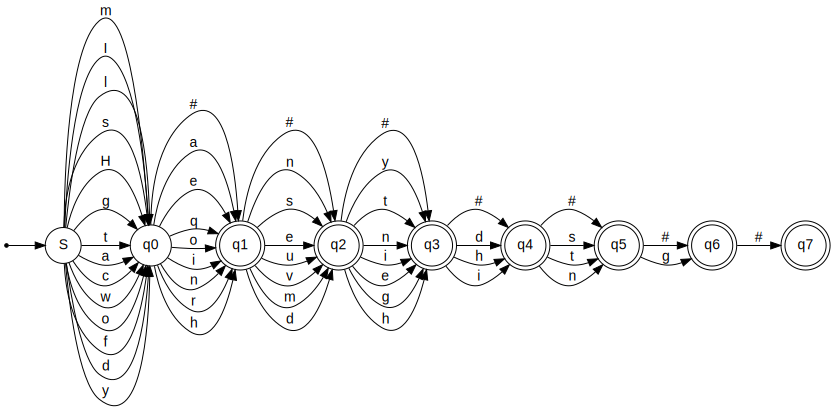

In [10]:
my_lexicon.reduce()
for w in lexicon_words:
    if not my_lexicon.run(w):
        print(f"Lexicon cannot parse word '{w}'")
    my_lexicon.reset()
my_lexicon.test_determinism()
my_lexicon.plot()

### A2.2: _(6 Punkte)_
Finite-State Transducer: Die Konvertierungsmethode `run` implementieren und erstellen/bauen des Transducers (`create`-Methode implementieren oder von Hand).

- Der Transducer soll/darf **nicht** deterministisch sein. Epsilon-Übergänge sind erwünscht und werden mit einem leeren String (`""`) umgesetzt. Es gibt deshalb auch eine Liste an aktuellen Zuständen, anstatt nur einem Zustand. Es können deshalb, auch (in der Theorie) mehrere Ergebnisse existieren, z. B. das Wort `run` könnte als Nomen und Verb interpretiert werden.
- Die `run`-Methode soll deshalb eine "Generator"-Funktion sein (infos [1](https://realpython.com/introduction-to-python-generators/), [2](https://www.tutorialsteacher.com/python/python-generator)). Mit `yield "1234"` "werft" ihr ein Ergebnis zurück und die Funktion wird an diesem Abschnitt weiter ausgeführt, sollten weitere Ergebnisse angefragt werden. `return` bricht die Iteration ab.
- Ihr dürft auch hier für die Implementierung weitere Methoden zur Klasse hinzufügen.
- Die Instanzen der `InOut` Klasse soll die Bedingungen des Transducers darstellen (`transition("q0", "q1", InOut("a", "b"))`).

**Wichtig:** Stellt die morphologische Struktur nach dem Grundwort in einzelnen Übergängen dar (`+N`, `+Sg`, ...) wie in Vorlesung 3 auf Folie 28. Die Wortgrenze soll dabei im letzten Übergang bearbeitet werden und die Pluralerkennung (`^s#`) soll auch mit dem morphologischen Output `+Pl` in einem Übergang bearbeitet werden. Auch hier muss der Transducer NICHT minimal sein (/morphologische Übergänge häufig wiederverwenden), aber die Morpheme/Stammwörter möglichst gruppieren (wie im Finite State Lexikon).

In [46]:
class InOut:
    """ class for a transducer condition in a FiniteStatePlot """
    def __init__(self, in_, out_):
        self.in_ = in_
        self.out_ = out_
        
    def __str__(self):
        return f"{self.in_ if self.in_ else 'ε'}:{self.out_ if self.out_ else 'ε'}"


class FiniteStateTransducer(FiniteStatePlot):
    
    def __init__(self, transitions:Dict[str, Tuple[str, str]]=None, final_states:Iterable[str]=None, start_state:str=None):
        super().__init__(transitions, final_states, start_state)
        self.reset()
        
    def reset(self):
        self.current_states = []
        
    def state_has_epsilon_transition(self, state):
        return any([io.in_ == "" for _, io in self.transitions[state]])
    
    def new_state(self):
        name = f"q{len(self.transitions)}"
        self.state(name)
        return name
    
    def run(self, word):
        # Eure Lösung wie der Transducer ein Wort in seine morphologische Struktur konvertiert. Bedenkt: Soll auch nicht deterministisch sein (mehrere aktuelle/aktive Zustände besitzen).
        
        # yield "abcd+N+Pl"
        # yield "abcd+V+Pst"
        self.current_states = self.start_states
        while word:
            next_states = []
            for current_state in self.current_states:
                for next_state, io in self.transitions[current_state]:
                    if io == "" or word.startswith(io):
                        next_states.append(next_state)
                        yield io
            if not next_states:
                return
            self.current_states = next_states
            word = word[len(io):]
        
    def create(self, words_and_output):
        # Eure Lösung hier, wie ein Transducer erstellt wird mittels einer gegebenen Menge an Wort-zu-Morphologische-Struktur Daten.
        # Benutzt die Klasse InOut für die condition im FiniteStatePlot/self.transitions( ...,condition=InOut(...))
        transitions = {}
        final_states = set()
        start_states = [self.new_state()]

        for word, output in words_and_output:
            current = start_states[0]
            for i, io in enumerate(output):
                next_state = self.new_state()
                condition = io
                transitions.setdefault(current, []).append((next_state, condition))
                current = next_state
            final_states.add(current)

        self.transitions = transitions
        self.final_states = final_states
        self.start_states = start_states
        self.reset()
        

Transducer cannot convert 'see#' to 'see+V+Pr'.
Transducer cannot convert 'game#' to 'game+N+Sg'.
Transducer cannot convert 'fish#' to 'fish+N+Sg'.
Transducer cannot convert 'catching#' to 'catch+V+Prs'.
Transducer cannot convert 'fishing#' to 'fishing+N+Sg'.
Transducer cannot convert 'caught#' to 'catch+V+Pst'.
Transducer cannot convert 'squid#' to 'squid+N+Sg'.
Transducer cannot convert 'seen#' to 'see+V+Pst'.
Transducer cannot convert 'squid^s#' to 'squid+N+Pl'.


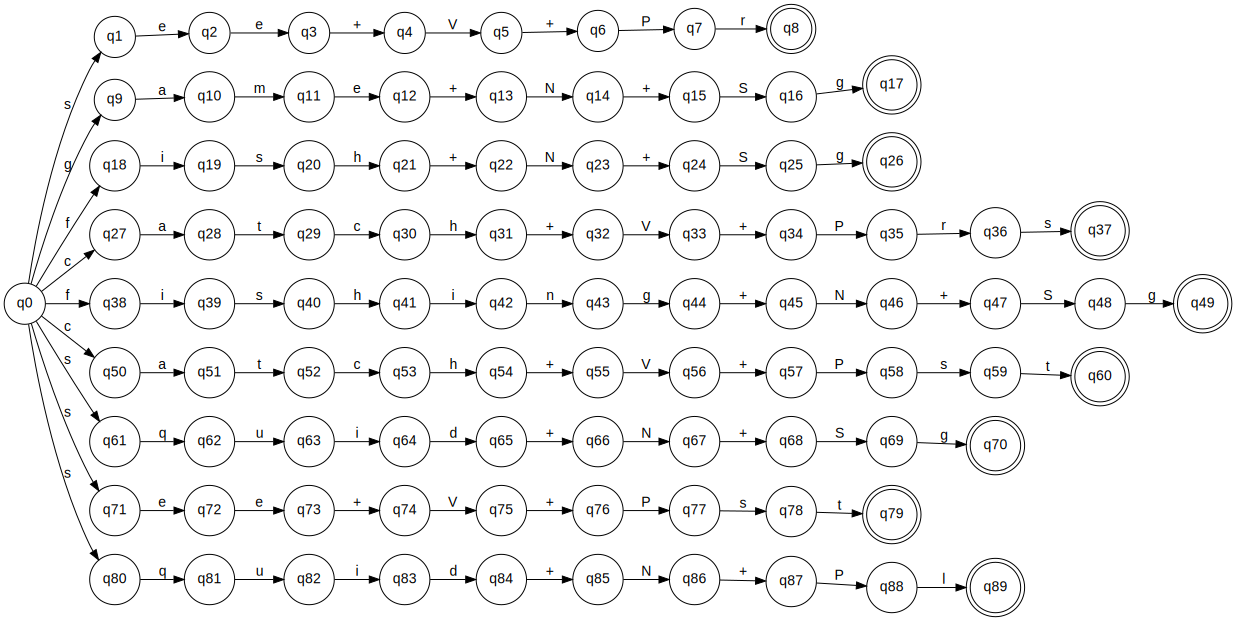

In [47]:
morph_structure = [
    ('see#', 'see+V+Pr'),
    ('game#', 'game+N+Sg'),
    ('fish#', 'fish+N+Sg'),
    ('catching#', 'catch+V+Prs'),
    ('fishing#', 'fishing+N+Sg'),
    ('caught#', 'catch+V+Pst'),
    ('squid#', 'squid+N+Sg'),
    ('seen#', 'see+V+Pst'),
    ('squid^s#', 'squid+N+Pl'),
]
fst = FiniteStateTransducer()
fst.create(morph_structure)  # implementieren

## Oder erstellt hier händisch einen Transducer, der nur genau diese Wörter parsen kann (epsilon => ""):
# fst.transition("q0", ...)

for w, morph in morph_structure:
    if not any(result == morph for result in fst.run(w)):
        print(f"Transducer cannot convert '{w}' to '{morph}'.")
    fst.reset()
fst.plot()

## Aufgabe 3: _(5 Punkte)_
Wechsel zur 4. Vorlesung: Syntax (Sätze).
### A3.1: _(1 Punkte)_
Erklärt den Begriff **Konstituente** und inwiefern dieser für die grammatische Analyse von Bedeutung ist.

#### Antwort:
Konstituente: Eine Konstituente ist eine Gruppe von Wörtern die zusammen eine (grammatikalische) Einheit bilden. Dabei kann diese Einheit aus entweder mehreren Wörtern oder auch teilweise einzelnen Wörtern bestehen die zusammen eine Phrase/Konstituente bilden. In der grammatischen Analyse hat eine Konstituente die Bedeutung, die Struktur eines Satzes zu verstehen und somit eine Sprache zu verstehen. Es ist ein wichtiger Bestandteil und dient zur Analyse und dazu, dass ein Computer eine Sprache überhaupt verstehen kann.

### A3.2: _(3 Punkte)_
Nennt sechs mögliche Tests, die benutzt werden können, um Konstituenten zu identifizieren. Beschreibt für jeden der Tests, wie er funktioniert und wie aussagekräftig er ist.

#### Antwort:
1. Substitutionstest: Dieser Test fragt, ob man eine Wortfolge in einem Satz gegen eine andere Wortfolge so austauschen kann, dass wieder ein sinnvoller Satz entstehen kann, so ist das ein Indiz das die beiden Wortfolgen ein Konstituent bilden. Dieser Test ist je nach Sprache sehr aussagekräftig, vorallem in der deutschen Sprache, da Sätze in der deutschen Sprache in sehr vielen Weisen darstellbar sind.

2. Pronominalisierungstest: In diesem Test geht es darum, dass alles worauf man sich mit einen Pronomen bezieht eine Konstituente ist. Dabei ist dieser sehr aussagekräftig, da dieser ein Indiz ist und  Pronomen ein wichtiger Bestandteil der deutschen Sprache sind.

3. Fragetest: Was sich erfragen lässt ist eine Konstituente -> Wenn sich eine Gruppe von Wörtern erfragen lässt ist sie höchstwahrscheinlich eine Konstituente. Dies ist ebenfalls ein aussagekräftiger Test.

4. Permutationstest: Bei dem Permutationstest handelt es sich um einen Test, wo ohne Beeinträchtigung der Akzeptablität des Satzes die Wortfolgen umgestellt werden können. Dies ist ein Indiz dafür, dass es sich um ein Konstituent handelt.

5. Voranstellungstest: Die Voranstellbarkeit (das vorstellen an den Anfang des Satzes einer Wortfolge) ist ein starkes Indiz für den Konstituentenstatus. Dies ist ebenfalls extrem leicht zu prüfen und somit aussagekräftig.

6. Koordinationstest: Wenn sich Wortfolgen koordinieren lassen, sodass der Satz seine Bedeutung nicht verliert ist dies ein Indiz  für den Konstituentenstatus. Allerdings ist dies ein eher aufwendiger test und daher nicht so gut geeignet wie manch ein anderer.

### A3.3: _(1 Punkte)_
Erklärt den Begriff **Attachment Ambiguität** am Beispiel des Satzes `She booked a flight having a meal.`

#### Antwort:
Der Begriff beschreibt einen Satz, wo eine Prase mehrdeutig ist durch die Anordnung des Satzes. 
In diesem Fall haben wir den Satz "She booked a flight having a meal". Hier ist es unklar, ob sich der Satz auf das "having a meal" oder das "She booked a flight" bezieht. Diese Art von Ambiguität sorgt für Verständnisprobleme.